In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("nutrition.csv")



In [3]:
df.head(10)

,food_id,food_name,category,serving_size_g,calories,protein_g,carbs_g,fat_g,fiber_g,sugar_g,sodium_mg,cholesterol_mg,vitamin_a_iu,vitamin_c_mg,calcium_mg,iron_mg,is_vegetarian,is_vegan,is_gluten_free
0,1,Grilled Chicken Breast,Protein,150,248,46.5,0.0,5.4,0.0,0.0,126,130,26,0.0,21,1.5,No,No,Yes
1,2,Brown Rice,Grains,195,216,5.0,45.0,1.8,3.5,0.7,10,0,0,0.0,20,1.1,Yes,Yes,Yes
2,3,Broccoli,Vegetables,91,31,2.5,6.0,0.4,2.4,1.5,30,0,567,81.0,43,0.7,Yes,Yes,Yes
3,4,Salmon Fillet,Protein,170,367,39.3,0.0,22.0,0.0,0.0,98,109,87,0.0,18,1.3,No,No,Yes
4,5,Quinoa,Grains,185,222,8.1,39.4,3.6,5.2,1.6,13,0,9,0.0,31,2.8,Yes,Yes,Yes
5,6,Spinach,Vegetables,30,7,0.9,1.1,0.1,0.7,0.1,24,0,2813,8.4,30,0.8,Yes,Yes,Yes
6,7,Greek Yogurt,Dairy,170,100,17.0,6.0,0.7,0.0,4.0,65,10,0,0.0,187,0.1,Yes,No,Yes
7,8,Almonds,Nuts,28,164,6.0,6.1,14.2,3.5,1.2,0,0,1,0.0,76,1.1,Yes,Yes,Yes
8,9,Sweet Potato,Vegetables,200,180,4.0,41.0,0.2,6.6,13.0,72,0,28058,39.2,76,1.4,Yes,Yes,Yes
9,10,Eggs,Protein,100,155,12.6,1.1,10.6,0.0,1.1,124,373,540,0.0,56,1.8,Yes,No,Yes


In [4]:
how_many_foods_each_category = df.groupby('category').size()

print(how_many_foods_each_category)

category
Dairy          4
Fats           3
Fruits         8
Grains         6
Legumes        3
Nuts           3
Protein       13
Sweeteners     1
Vegetables     9
dtype: int64


In [5]:
#Find the Top 5 food with the highest fiber-to-calories ratio

fiber_per_calories = df['fiber_g'] / df['calories']

print(fiber_per_calories)

0     0.000000
1     0.016204
2     0.077419
3     0.000000
4     0.023423
5     0.100000
6     0.000000
7     0.021341
8     0.036667
9     0.000000
10    0.025316
11    0.029524
12    0.046316
13    0.041925
14    0.004255
15    0.007595
16    0.000000
17    0.067826
18    0.000000
19    0.000000
20    0.011364
21    0.050000
22    0.000000
23    0.010106
24    0.069231
25    0.000000
26    0.000000
27    0.046468
28    0.042857
29    0.077778
30    0.000000
31    0.066079
32    0.026263
33    0.010270
34    0.039394
35    0.000000
36    0.002913
37    0.061224
38    0.067742
39    0.000000
40    0.000000
41    0.000000
42    0.000000
43    0.000000
44    0.047619
45    0.103704
46    0.028049
47    0.000000
48    0.000000
49    0.000000
dtype: float64


In [6]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [7]:
df["fiber_per_calories"] = df['fiber_g'] / df['calories']

In [8]:
top_5 = (
    df.sort_values(by='fiber_per_calories',ascending=False).head(5)
)

In [9]:
top_5[['food_name', 'calories','fiber_g','calories','fiber_per_calories']]

,food_name,calories,fiber_g,calories,fiber_per_calories
45,Asparagus,27,2.8,27,0.103704
5,Spinach,7,0.7,7,0.100000
29,Cauliflower,27,2.1,27,0.077778
2,Broccoli,31,2.4,31,0.077419
24,Carrots,52,3.6,52,0.069231


In [10]:
gluten_free_and_vegan_free = df[(df['is_gluten_free'] == 'Yes') & (df['is_vegan'] == 'Yes')]

print(len(gluten_free_and_vegan_free))

30


In [11]:
vegetable_sodium = df.loc[
    df['category'] == 'Vegetables',
    ['food_name', 'sodium_mg']
]

print(vegetable_sodium)

       food_name  sodium_mg
2       Broccoli         30
5        Spinach         24
8   Sweet Potato         72
24       Carrots         88
29   Cauliflower         32
34          Kale         29
38   Bell Pepper          4
44     Mushrooms          5
45     Asparagus          3


In [12]:
total_sodium_of_all_vegetables = df[df['category'] == 'Vegetables']['sodium_mg'].sum()

print(total_sodium_of_all_vegetables)

287


In [13]:
count_of_foods_per_category = df.groupby('category').size().reset_index(name='count')
print(count_of_foods_per_category)

     category  count
0       Dairy      4
1        Fats      3
2      Fruits      8
3      Grains      6
4     Legumes      3
5        Nuts      3
6     Protein     13
7  Sweeteners      1
8  Vegetables      9


In [14]:
df['health_score'] = df['protein_g'] + df['fiber_g'] + (df['vitamin_c_mg'] / 10) - (df['sugar_g'] / 2) - (df['sodium_mg'] / 100)
print(df['health_score'])

0     45.24
1      8.05
2     11.95
3     38.32
4     12.37
5      2.15
6     14.35
7      8.90
8      7.30
9     10.81
10     8.35
11    -1.78
12    -3.78
13    18.71
14    10.06
15     1.08
16     5.21
17    32.06
18    27.46
19    41.27
20    10.19
21     5.17
22     0.80
23     7.04
24     1.63
25    56.70
26    18.44
27    23.10
28    -1.37
29     8.04
30    39.09
31    30.04
32    -1.51
33     5.88
34    11.25
35    34.94
36     4.83
37     9.22
38    16.16
39    22.89
40    -8.40
41     0.00
42    -0.81
43     0.00
44     3.26
45     5.27
46     2.93
47     4.69
48     2.68
49     4.11
Name: health_score, dtype: float64


In [15]:
df['pct_protein'] = (df['protein_g'] *4) / (df['calories'] * 100)

In [16]:
df['pct_carbs'] = (df['carbs_g'] *4) / (df['calories'] * 100)

In [17]:
df['pct_fats'] = (df['fat_g'] *4) / (df['calories'] * 100)

In [18]:
print(df[['food_name','pct_protein']])

                 food_name  pct_protein
0   Grilled Chicken Breast     0.007500
1               Brown Rice     0.000926
2                 Broccoli     0.003226
3            Salmon Fillet     0.004283
4                   Quinoa     0.001459
5                  Spinach     0.005143
6             Greek Yogurt     0.006800
7                  Almonds     0.001463
8             Sweet Potato     0.000889
9                     Eggs     0.003252
10                 Oatmeal     0.001519
11                  Banana     0.000495
12                   Apple     0.000211
13                 Avocado     0.000497
14                    Tofu     0.004255
15             White Bread     0.001367
16          Cheddar Cheese     0.002478
17                 Lentils     0.003130
18           Chicken Thigh     0.004978
19                    Tuna     0.008817
20                   Pasta     0.001473
21                  Orange     0.000774
22            Milk (Whole)     0.002148
23           Peanut Butter     0.001702


In [19]:
class DataAnalyzer:
    def __init__(self,filepath):
        self.df = pd.read_csv(filepath)
        self.filepath = filepath

    def get_shape(self):
        return self.df.shape

    def get_columns(self):
        return list(self.df.columns)

    def preview(self,n=5):
        return self.df.head(n)

    def info(self):
        return f"Rows: {len(self.df)}, Columns: {len(self.df.columns)}"


In [20]:
class NutritionAnalyzer(DataAnalyzer):
    def __init__(self,filepath):
        super().__init__(filepath)
    
    def high_protein_foods(self,min_protein=20):
        return self.df[self.df['protein_g'] >= min_protein][['food_name','protein_g','calories']]

    def foods_by_category(self,category):
        return self.df[self.df['category'] == category]
    
    def get_vegan_options(self):
        return self.df[self.df['is_vegan'] == 'Yes']['food_name'].tolist()

    def calories_summary(self):
        return self.df.groupby('category')['calories'].agg(['mean','median','min','max'])

    def avg_calories(self):
        return round(self.df['calories'].mean(),2)

        

In [21]:
analyzer = NutritionAnalyzer('nutrition.csv')

In [22]:
print(analyzer.get_shape())

(50, 19)


In [23]:
print(analyzer.get_columns())

['food_id', 'food_name', 'category', 'serving_size_g', 'calories', 'protein_g', 'carbs_g', 'fat_g', 'fiber_g', 'sugar_g', 'sodium_mg', 'cholesterol_mg', 'vitamin_a_iu', 'vitamin_c_mg', 'calcium_mg', 'iron_mg', 'is_vegetarian', 'is_vegan', 'is_gluten_free']


In [24]:
print(analyzer.high_protein_foods(20))

                 food_name  protein_g  calories
0   Grilled Chicken Breast       46.5       248
3            Salmon Fillet       39.3       367
18           Chicken Thigh       28.5       229
19                    Tuna       42.1       191
25              Beef Steak       58.0       614
26          Cottage Cheese       28.0       206
30           Turkey Breast       40.0       189
35               Pork Chop       35.7       291
39                  Shrimp       24.0        99


In [25]:
print(analyzer.get_vegan_options())

['Brown Rice', 'Broccoli', 'Quinoa', 'Spinach', 'Almonds', 'Sweet Potato', 'Oatmeal', 'Banana', 'Apple', 'Avocado', 'Tofu', 'White Bread', 'Lentils', 'Pasta', 'Orange', 'Peanut Butter', 'Carrots', 'Chickpeas', 'Blueberries', 'Cauliflower', 'Black Beans', 'Mango', 'Walnuts', 'Kale', 'White Rice', 'Strawberries', 'Bell Pepper', 'Honey', 'Olive Oil', 'Coconut Oil', 'Mushrooms', 'Asparagus', 'Pineapple']


In [26]:
print(analyzer.calories_summary())

                  mean  median  min  max
category                                
Dairy       142.000000   131.0  100  206
Fats        114.000000   119.0  102  121
Fruits      112.250000    89.5   49  322
Grains      183.500000   211.0   79  222
Legumes     242.000000   230.0  227  269
Nuts        179.000000   185.0  164  188
Protein     235.461538   191.0   94  614
Sweeteners   64.000000    64.0   64   64
Vegetables   45.444444    31.0    7  180


In [27]:
print(analyzer.info())

Rows: 50, Columns: 19


In [28]:
print(analyzer.avg_calories())

154.12


In [29]:
class FoodTracker:

    daily_calories_goal = 2000

    def __init__(self,filepath):
        self.df = pd.read_csv(filepath)
        self.eaten = []

    def eat(self,food_name):
        food = self.df[self.df['food_name'] == food_name]

        if not food.empty:
            self.eaten.append(food.iloc[0])
        return self

    @property
    def total_calories(self):
        return sum(f['calories'] for f in self.eaten)

    @property
    def remaining_calories(self):
        return FoodTracker.daily_calories_goal - self.total_calories

In [30]:
tracker = FoodTracker('nutrition.csv')

tracker.eat('Banana').eat('Grilled Chicken Breast').eat('Oatmeal').eat('Apple')

print(f'Eaten {tracker.total_calories} cal')

Eaten 606 cal


In [31]:
food_category = df.groupby('category').size()

print(food_category)

category
Dairy          4
Fats           3
Fruits         8
Grains         6
Legumes        3
Nuts           3
Protein       13
Sweeteners     1
Vegetables     9
dtype: int64


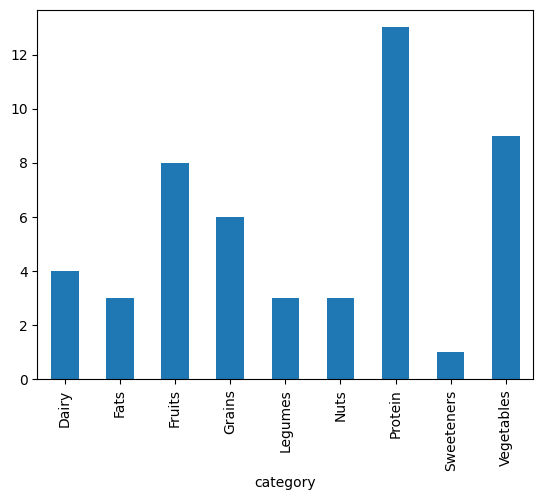

In [32]:
food_category.plot(kind='bar', x='category', y='count')
plt.show()

KeyError: 'count'